In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('/run/media/devesh/Hard Disk/Projects/Datahack-Customer-Segmentation/input/Train.csv')
test = pd.read_csv('/run/media/devesh/Hard Disk/Projects/Datahack-Customer-Segmentation/input/Test.csv')

In [3]:
train.head()

ID  Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0  462809    Male           No   22        No     Healthcare              1.0   
1  462643  Female          Yes   38       Yes       Engineer              NaN   
2  466315  Female          Yes   67       Yes       Engineer              1.0   
3  461735    Male          Yes   67       Yes         Lawyer              0.0   
4  462669  Female          Yes   40       Yes  Entertainment              NaN   

  Spending_Score  Family_Size  Var_1 Segmentation  
0            Low          4.0  Cat_4            D  
1        Average          3.0  Cat_4            A  
2            Low          1.0  Cat_6            B  
3           High          2.0  Cat_6            B  
4           High          6.0  Cat_6            A

In [4]:
train = train.sort_values('ID').reset_index(drop = True)

In [5]:
train.head()

ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458982    Male          Yes   61       Yes   Executive              1.0   
1  458983  Female          Yes   63       Yes   Executive              0.0   
2  458984    Male          Yes   39       Yes      Artist              0.0   
3  458985    Male           No   23        No  Healthcare              1.0   
4  458986    Male           No   18        No  Healthcare              7.0   

  Spending_Score  Family_Size  Var_1 Segmentation  
0           High          3.0  Cat_6            C  
1           High          5.0  Cat_6            C  
2        Average          3.0  Cat_6            C  
3            Low          4.0  Cat_6            D  
4            Low          4.0  Cat_6            D

In [6]:
test.head()

ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458989  Female          Yes   36       Yes    Engineer              0.0   
1  458994    Male          Yes   37       Yes  Healthcare              8.0   
2  458996  Female          Yes   69        No         NaN              0.0   
3  459000    Male          Yes   59        No   Executive             11.0   
4  459001  Female           No   19        No   Marketing              NaN   

  Spending_Score  Family_Size  Var_1  
0            Low          1.0  Cat_6  
1        Average          4.0  Cat_6  
2            Low          1.0  Cat_6  
3           High          2.0  Cat_6  
4            Low          4.0  Cat_6

In [7]:
train['tag'] = 'TRAIN'
test['tag'] = 'TEST'

In [47]:
df = pd.concat([train, test]).sort_values('ID').reset_index(drop = True)

In [9]:
df.head()

ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458982    Male          Yes   61       Yes   Executive              1.0   
1  458983  Female          Yes   63       Yes   Executive              0.0   
2  458984    Male          Yes   39       Yes      Artist              0.0   
3  458985    Male           No   23        No  Healthcare              1.0   
4  458986    Male           No   18        No  Healthcare              7.0   

  Spending_Score  Family_Size  Var_1 Segmentation    tag  
0           High          3.0  Cat_6            C  TRAIN  
1           High          5.0  Cat_6            C  TRAIN  
2        Average          3.0  Cat_6            C  TRAIN  
3            Low          4.0  Cat_6            D  TRAIN  
4            Low          4.0  Cat_6            D  TRAIN

In [10]:
df.tail()

ID  Gender Ever_Married  Age Graduated Profession  Work_Experience  \
10690  467969  Female          Yes   43       Yes     Artist              0.0   
10691  467971  Female           No   31       Yes     Artist              1.0   
10692  467972    Male           No   22        No     Artist              1.0   
10693  467973  Female          Yes   66       Yes   Engineer              0.0   
10694  467974  Female           No   43       Yes     Artist              1.0   

      Spending_Score  Family_Size  Var_1 Segmentation    tag  
10690        Average          2.0  Cat_6            C  TRAIN  
10691            Low          4.0  Cat_6            D  TRAIN  
10692            Low          3.0  Cat_6            D  TRAIN  
10693        Average          3.0  Cat_6            A  TRAIN  
10694            Low          1.0  Cat_4            B  TRAIN

In [11]:
df[:10]

ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458982    Male          Yes   61       Yes   Executive              1.0   
1  458983  Female          Yes   63       Yes   Executive              0.0   
2  458984    Male          Yes   39       Yes      Artist              0.0   
3  458985    Male           No   23        No  Healthcare              1.0   
4  458986    Male           No   18        No  Healthcare              7.0   
5  458987  Female          Yes   72       Yes      Lawyer              0.0   
6  458988  Female           No   29        No   Marketing              2.0   
7  458989  Female          Yes   36       Yes    Engineer              0.0   
8  458989  Female          Yes   42       Yes    Engineer              1.0   
9  458990  Female          Yes   71        No      Lawyer              1.0   

  Spending_Score  Family_Size  Var_1 Segmentation    tag  
0           High          3.0  Cat_6            C  TRAIN  
1           High          5.0  Cat_6            C  TRAIN  
2        Average          3.0  Cat_6            C  TRAIN  
3            Low          4.0  Cat_6            D  TRAIN  
4            Low          4.0  Cat_6            D  TRAIN  
5           High          2.0  Cat_6            C  TRAIN  
6            Low          3.0  Cat_6            D  TRAIN  
7            Low          1.0  Cat_6          NaN   TEST  
8            Low          1.0  Cat_6            B  TRAIN  
9           High          3.0  Cat_6            D  TRAIN

In [16]:
uncommon_test = pd.read_csv('new_test.csv')

In [17]:
uncommon_test.head()

Gender  Ever_Married  Age  Graduated  Profession  Work_Experience  \
0       1             1   61          1           1              5.0   
1       0             1   88          1           7              1.0   
2       1             0   31          0           0              1.0   
3       1             1   60          1           0              2.0   
4       0             1   51          1           0              3.0   

   Spending_Score  Family_Size  Var_1  ref_ID  
0               2          3.0      5  459005  
1               0          4.0      5  459045  
2               2          2.0      5  459090  
3               0          5.0      5  459116  
4               0          6.0      5  459121

In [20]:
df[28:35]

ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
28  459004  Female          Yes   51       Yes      Artist              1.0   
29  459005    Male          Yes   61       Yes      Doctor              5.0   
30  459006    Male           No   20        No  Healthcare              1.0   
31  459007  Female          Yes   42       Yes      Artist              1.0   
32  459008  Female          Yes   52       Yes      Artist              1.0   
33  459008  Female          Yes   47       Yes      Artist              1.0   
34  459009  Female          Yes   50       Yes      Artist              1.0   

   Spending_Score  Family_Size  Var_1 Segmentation    tag  
28           High          5.0  Cat_6            C  TRAIN  
29            Low          3.0  Cat_6          NaN   TEST  
30            Low          4.0  Cat_6            D  TRAIN  
31        Average          3.0  Cat_6            C  TRAIN  
32        Average          3.0  Cat_6            B  TRAIN  
33        Average          3.0  Cat_6          NaN   TEST  
34        Average          3.0  Cat_6            C  TRAIN

In [12]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
tag                   0
dtype: int64

In [376]:
df_non_null = df.copy()

In [377]:
df_non_null['Ever_Married'] = df_non_null['Ever_Married'].fillna('No')
df_non_null['Graduated'] = df_non_null['Graduated'].fillna('No')
df_non_null['Profession'] = df_non_null['Profession'].fillna('Artist')
df_non_null['Work_Experience'] = df_non_null['Work_Experience'].fillna(0.0)
df_non_null['Family_Size'] = df_non_null['Family_Size'].fillna(2.0)
df_non_null['Var_1'] = df_non_null['Var_1'].fillna('Cat_6')

In [378]:
df_non_null.isnull().sum()

ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience       0
Spending_Score        0
Family_Size           0
Var_1                 0
Segmentation       2627
tag                   0
age_great_40          0
cat_4_3_1             0
FS_3_4_5_6            0
dtype: int64

In [40]:
cat_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

In [41]:
# cat_cols.remove('Segmentation')

In [42]:
# cat_cols.remove('tag')

In [43]:
# for i in range(len(cat_cols)-1):
#     col = cat_cols[i] + '_' + cat_cols[i+1]
#     df[col] = df[cat_cols[i]] + '_' + df[cat_cols[i+1]]

In [72]:
df.head()

ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458982    Male          Yes   61       Yes   Executive              1.0   
1  458983  Female          Yes   63       Yes   Executive              0.0   
2  458984    Male          Yes   39       Yes      Artist              0.0   
3  458985    Male           No   23        No  Healthcare              1.0   
4  458986    Male           No   18        No  Healthcare              7.0   

  Spending_Score  Family_Size  Var_1 Segmentation    tag  
0           High          3.0  Cat_6            C  TRAIN  
1           High          5.0  Cat_6            C  TRAIN  
2        Average          3.0  Cat_6            C  TRAIN  
3            Low          4.0  Cat_6            D  TRAIN  
4            Low          4.0  Cat_6            D  TRAIN

In [48]:
age_great_40 = []

for i in range(len(df)):
    if df['Age'][i] > 40:
        age_great_40.append(1)
    else:
        age_great_40.append(0)

In [49]:
df['age_great_40'] = age_great_40

In [50]:
cat_4_3_1 = []
# cat_6_7_1_5 = []

for i in range(len(df)):
    if (df['Var_1'][i] == 'Cat_4') or (df['Var_1'][i] == 'Cat_3') or (df['Var_1'][i] == 'Cat_1'):
        cat_4_3_1.append(1)
#         cat_6_7_1_5.append(0)
    else:
        cat_4_3_1.append(0)
#         cat_6_7_1_5.append(1)

In [51]:
df['cat_4_3_1'] = cat_4_3_1

In [52]:
FS_3_4_5_6 = []

for i in range(len(df)):
    if (df['Family_Size'][i] == 3.0) or (df['Family_Size'][i] == 4.0) or (df['Family_Size'][i] == 5.0) or (df['Family_Size'][i] == 6.0):
        FS_3_4_5_6.append(1)
    else:
        FS_3_4_5_6.append(0)

In [53]:
df['FS_3_4_5_6'] = FS_3_4_5_6

In [54]:
df.head()

ID  Gender Ever_Married  Age Graduated  Profession  Work_Experience  \
0  458982    Male          Yes   61       Yes   Executive              1.0   
1  458983  Female          Yes   63       Yes   Executive              0.0   
2  458984    Male          Yes   39       Yes      Artist              0.0   
3  458985    Male           No   23        No  Healthcare              1.0   
4  458986    Male           No   18        No  Healthcare              7.0   

  Spending_Score  Family_Size  Var_1 Segmentation    tag  age_great_40  \
0           High          3.0  Cat_6            C  TRAIN             1   
1           High          5.0  Cat_6            C  TRAIN             1   
2        Average          3.0  Cat_6            C  TRAIN             0   
3            Low          4.0  Cat_6            D  TRAIN             0   
4            Low          4.0  Cat_6            D  TRAIN             0   

   cat_4_3_1  FS_3_4_5_6  
0          0           1  
1          0           1  
2          0           1  
3          0           1  
4          0           1

In [55]:
for i in range(len(df)):
    if df['Spending_Score'][i] == 'Average':
        df['Spending_Score'][i] = 'High'

/home/devesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [59]:
cat_cols = ['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1']

In [379]:
from sklearn.preprocessing import LabelEncoder
seg_dict = {'A':0,
           'B':1,
           'C':2,
           'D':3}

rev_seg_dict = {0:'A',
               1:'B',
               2:'C',
               3:'D'}

df['Segmentation'] = df['Segmentation'].map(seg_dict)
df_non_null['Segmentation'] = df_non_null['Segmentation'].map(seg_dict)

In [61]:
df_non_null.groupby(cat_cols[0])['Segmentation'].mean()

Gender
Female    1.528896
Male      1.589314
Name: Segmentation, dtype: float64

In [62]:
df_non_null.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'tag', 'age_great_40', 'cat_4_3_1', 'FS_3_4_5_6'],
      dtype='object')

In [63]:
one_hot_cols = ['Gender', 'Ever_Married', 'Var_1']
label_cols = ['Graduated', 'Profession', 'Spending_Score']

In [380]:
from sklearn.preprocessing import LabelEncoder
encoder_data = LabelEncoder()

for col in label_cols:
#     x = df_non_null.groupby(col)['Segmentation'].mean()
#     df_non_null[col] = df_non_null[col].map(x)
    df_non_null[col] = encoder_data.fit_transform(df_non_null[col])

In [381]:
df_non_null.head()

ID  Gender Ever_Married  Age  Graduated  Profession  Work_Experience  \
0  458982       1          Yes   61          1           4              1.0   
1  458983       0          Yes   63          1           4              0.0   
2  458984       1          Yes   39          1           0              0.0   
3  458985       1           No   23          0           5              1.0   
4  458986       1           No   18          0           5              7.0   

   Spending_Score  Family_Size  Var_1  Segmentation    tag  age_great_40  \
0               0          3.0  Cat_6           NaN  TRAIN             1   
1               0          5.0  Cat_6           NaN  TRAIN             1   
2               0          3.0  Cat_6           NaN  TRAIN             0   
3               1          4.0  Cat_6           NaN  TRAIN             0   
4               1          4.0  Cat_6           NaN  TRAIN             0   

   cat_4_3_1  FS_3_4_5_6  
0          0           1  
1          0           1  
2          0           1  
3          0           1  
4          0           1

In [354]:
# for col in cat_cols:
#     df[col] = encoder_data.fit_transform(df[col])

In [382]:
pd.get_dummies(df_non_null[one_hot_cols[0]], drop_first=True)

for col in one_hot_cols:
    df_non_null = pd.concat([df_non_null, pd.get_dummies(df_non_null[col], drop_first=True)], axis = 1)
    df_non_null.drop(col, axis = 1, inplace = True)

In [383]:
df_non_null.head()

ID  Age  Graduated  Profession  Work_Experience  Spending_Score  \
0  458982   61          1           4              1.0               0   
1  458983   63          1           4              0.0               0   
2  458984   39          1           0              0.0               0   
3  458985   23          0           5              1.0               1   
4  458986   18          0           5              7.0               1   

   Family_Size  Segmentation    tag  age_great_40  cat_4_3_1  FS_3_4_5_6  1  \
0          3.0           NaN  TRAIN             1          0           1  1   
1          5.0           NaN  TRAIN             1          0           1  0   
2          3.0           NaN  TRAIN             0          0           1  1   
3          4.0           NaN  TRAIN             0          0           1  1   
4          4.0           NaN  TRAIN             0          0           1  1   

   Yes  Cat_2  Cat_3  Cat_4  Cat_5  Cat_6  Cat_7  
0    1      0      0      0      0      1      0  
1    1      0      0      0      0      1      0  
2    1      0      0      0      0      1      0  
3    0      0      0      0      0      1      0  
4    0      0      0      0      0      1      0

In [384]:
new_train_cat = df_non_null.loc[df_non_null['tag'] == 'TRAIN']
new_test_cat = df_non_null.loc[df_non_null['tag'] == 'TEST']
new_train = df.loc[df['tag'] == 'TRAIN']
new_test = df.loc[df['tag'] == 'TEST']

In [385]:
common_df = pd.merge(new_train_cat, new_test_cat, on = 'ID')

In [386]:
len(common_df)

2332

In [387]:
common_seg = pd.DataFrame()

common_seg['ID'] = list(common_df['ID'])
common_seg['Segmentation'] = common_df['Segmentation_x']

In [388]:
test_copy = new_test_cat.copy()
test_copy = test_copy.set_index('ID')
test_copy.drop(list(common_df['ID']), inplace = True)

295

In [392]:
new_train_cat.drop(['ID', 'tag'], axis = 1, inplace = True)
new_test_cat.drop(['ID', 'tag'], axis = 1, inplace = True)
new_train.drop(['ID', 'tag'], axis = 1, inplace = True)
new_test.drop(['ID', 'tag'], axis = 1, inplace = True)

/home/devesh/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [169]:
cat_cols = list(df.select_dtypes(include = 'object').columns)

In [170]:
cat_cols

['Segmentation', 'tag']

In [146]:
cat_cols.remove('Segmentation')

In [147]:
cat_cols.remove('tag')

In [160]:
# from sklearn.preprocessing import LabelEncoder
# encoder_data = LabelEncoder()

# for col in cat_cols:
#     new_train[col] = encoder_data.fit_transform(new_train[col])

/home/devesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [393]:
new_train_cat.head()

Age  Graduated  Profession  Work_Experience  Spending_Score  Family_Size  \
0   61          1           4              1.0               0          3.0   
1   63          1           4              0.0               0          5.0   
2   39          1           0              0.0               0          3.0   
3   23          0           5              1.0               1          4.0   
4   18          0           5              7.0               1          4.0   

   Segmentation  age_great_40  cat_4_3_1  FS_3_4_5_6  1  Yes  Cat_2  Cat_3  \
0           NaN             1          0           1  1    1      0      0   
1           NaN             1          0           1  0    1      0      0   
2           NaN             0          0           1  1    1      0      0   
3           NaN             0          0           1  1    0      0      0   
4           NaN             0          0           1  1    0      0      0   

   Cat_4  Cat_5  Cat_6  Cat_7  
0      0      0      1      0  
1      0      0      1      0  
2      0      0      1      0  
3      0      0      1      0  
4      0      0      1      0

In [398]:
cols = list(new_train_cat.columns)

In [399]:
cols

['Age',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Spending_Score',
 'Family_Size',
 'age_great_40',
 'cat_4_3_1',
 'FS_3_4_5_6',
 1,
 'Yes',
 'Cat_2',
 'Cat_3',
 'Cat_4',
 'Cat_5',
 'Cat_6',
 'Cat_7']

In [73]:
# cols.remove('ID')
cols.remove('Segmentation')
# cols.remove('tag')

In [104]:
cat_cols = ['Graduated', 'Profession', 'Spending_Score', 'Male', 'Yes']

In [396]:
label = new_train_cat.pop('Segmentation')

In [397]:
new_train_cat.head()

Age  Graduated  Profession  Work_Experience  Spending_Score  Family_Size  \
0   61          1           4              1.0               0          3.0   
1   63          1           4              0.0               0          5.0   
2   39          1           0              0.0               0          3.0   
3   23          0           5              1.0               1          4.0   
4   18          0           5              7.0               1          4.0   

   age_great_40  cat_4_3_1  FS_3_4_5_6  1  Yes  Cat_2  Cat_3  Cat_4  Cat_5  \
0             1          0           1  1    1      0      0      0      0   
1             1          0           1  0    1      0      0      0      0   
2             0          0           1  1    1      0      0      0      0   
3             0          0           1  1    0      0      0      0      0   
4             0          0           1  1    0      0      0      0      0   

   Cat_6  Cat_7  
0      1      0  
1      1      0  
2      1      0  
3      1      0  
4      1      0

In [105]:
import lightgbm

lgb_dataset = lightgbm.Dataset(new_train_cat, label=label, categorical_feature=cat_cols, feature_name=cols)

In [113]:
params = {
    'objective':'multiclass',
    'num_iterations':61,
    'num_leaves':25,
    'num_classes':4,
    'device':'gpu'
}

In [117]:
lightgbm.cv(params, lgb_dataset, categorical_feature=cat_cols, feature_name=cols)

/home/devesh/anaconda3/lib/python3.7/site-packages/lightgbm/engine.py:503: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


{'multi_logloss-mean': [1.3443800976291769,
  1.3109018307873304,
  1.2823394539445458,
  1.2574382936845243,
  1.2360099567458325,
  1.2170228037800757,
  1.2003947586665,
  1.1857077076759517,
  1.1728416568642335,
  1.160836988805238,
  1.1503694194310863,
  1.1412546740499336,
  1.132843730020959,
  1.1254882558729653,
  1.1189428918826612,
  1.1129793348854664,
  1.1076054018080739,
  1.1025835034614089,
  1.0980368913572964,
  1.0938286814590898,
  1.090038308616569,
  1.0868186422436887,
  1.0836957091337622,
  1.0808078893105015,
  1.0781992139101158,
  1.0756698843597374,
  1.0737165943155786,
  1.0717685297717678,
  1.0701253883409632,
  1.0685245026894847,
  1.0668896363472775,
  1.0655463068972173,
  1.0643225164432906,
  1.0631733362942142,
  1.0621256188685246,
  1.0613667906833224,
  1.0605600239538047,
  1.0598169678062348,
  1.0591255433462852,
  1.05854528603044,
  1.0580977478950584,
  1.0573606759693919,
  1.056939918172052,
  1.0566944393547937,
  1.056468767144589

In [400]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaled_df_train = scaler.fit_transform(new_train_cat)

In [312]:
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# model = LGBMClassifier(n_estimators=61, num_leaves=25)
# model = XGBClassifier()
model = svm
scores = cross_val_score(model, scaled_df_train, label, cv = 5, scoring = 'accuracy')

In [313]:
scores.mean()

0.5058232714215586

In [104]:
new_train.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'tag', 'age_great_40', 'cat_4_3_1', 'FS_3_4_5_6'],
      dtype='object')

In [120]:
cluster_cols = ['Age', 'Work_Experience', 'Family_Size']

cluster_df = df_non_null[cluster_cols]

In [121]:
from sklearn.preprocessing import MinMaxScaler

scaler_cluster = MinMaxScaler()

scaled_cluster_df = scaler_cluster.fit_transform(cluster_df)

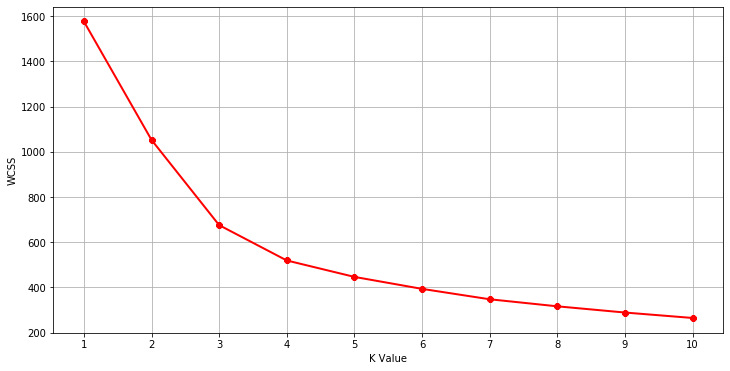

In [122]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(scaled_cluster_df)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [123]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(scaled_cluster_df)

In [124]:
df_non_null['clusters'] = clusters

In [125]:
df_non_null.head()

ID  Age  Graduated  Profession  Work_Experience  Spending_Score  \
0  458982   61          1           4              1.0               0   
1  458983   63          1           4              0.0               0   
2  458984   39          1           0              0.0               0   
3  458985   23          0           5              1.0               1   
4  458986   18          0           5              7.0               1   

   Family_Size  Segmentation    tag  age_great_40  ...  FS_3_4_5_6  Male  Yes  \
0          3.0           2.0  TRAIN             1  ...           1     1    1   
1          5.0           2.0  TRAIN             1  ...           1     0    1   
2          3.0           2.0  TRAIN             0  ...           1     1    1   
3          4.0           3.0  TRAIN             0  ...           1     1    0   
4          4.0           3.0  TRAIN             0  ...           1     1    0   

   Cat_2  Cat_3  Cat_4  Cat_5  Cat_6  Cat_7  clusters  
0      0      0      0      0      1      0         0  
1      0      0      0      0      1      0         0  
2      0      0      0      0      1      0         1  
3      0      0      0      0      1      0         1  
4      0      0      0      0      1      0         2  

[5 rows x 21 columns]

In [158]:
new_train = df.loc[df['tag'] == 'TRAIN']
new_test = df.loc[df['tag'] == 'TEST']

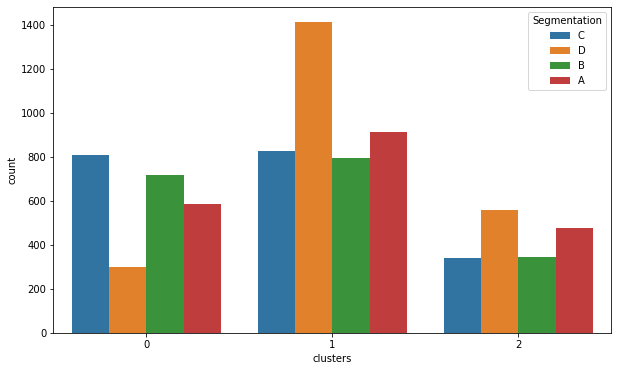

In [159]:
plt.figure(figsize = (10,6))

sns.countplot(new_train['clusters'], hue = new_train['Segmentation'])

In [190]:
len(common_df)

2332

In [175]:
# common_seg = pd.DataFrame()

# common_seg['ID'] = list(common_df['ID'])
# common_seg['Segmentation'] = common_df['Segmentation_x']

In [191]:
len(common_df)

2332

In [192]:
test_copy = new_test.copy()

In [193]:
test_copy = test_copy.set_index('ID')

In [194]:
test_copy.drop(list(common_df['ID']), inplace = True)

In [195]:
len(test_copy)

295

In [196]:
cols

['Gender',
 'Ever_Married',
 'Age',
 'Graduated',
 'Profession',
 'Work_Experience',
 'Spending_Score',
 'Family_Size',
 'Var_1',
 'age_great_40',
 'cat_4_3_1',
 'FS_3_4_5_6',
 'clusters']

In [272]:
model.fit(new_train[cols], new_train['Segmentation'])

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=52,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [273]:
preds = model.predict(test_copy[cols])

In [274]:
uncommon_seg = pd.DataFrame()

uncommon_seg['ID'] = list(test_copy.index)
uncommon_seg['Segmentation'] = preds

In [275]:
seg = pd.concat([common_seg, uncommon_seg]).reset_index(drop = True)

In [276]:
seg.tail()

ID Segmentation
2622  467913            B
2623  467930            C
2624  467938            A
2625  467960            A
2626  467968            D

In [204]:
sub = pd.read_csv("/run/media/devesh/Hard Disk/Projects/Datahack-Customer-Segmentation/input/sample_submission.csv")

In [207]:
sub.drop(['Segmentation'], axis = 1, inplace = True)

In [277]:
final_sub = pd.merge(sub, seg, on = 'ID')

In [278]:
final_sub.head()

ID Segmentation
0  458989            B
1  458994            C
2  458996            A
3  459000            C
4  459001            C

In [279]:
final_sub.to_csv('sub_6.csv', index = False)

In [211]:
!pip install bayesian-optimization

  Using cached bayesian-optimization-1.2.0.tar.gz (14 kB)
  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11684 sha256=4f7c1d62994caf7ee24323fd1596a59edbcb79031879adc74d27449cd292092e
  Stored in directory: /home/devesh/.cache/pip/wheels/fd/9b/71/f127d694e02eb40bcf18c7ae9613b88a6be4470f57a8528c5b
Successfully built bayesian-optimization


In [153]:
from bayes_opt import BayesianOptimization
from bayes_opt.util import Colours

def lgb_cv(n_estimators, num_leaves, data, targets):
    """Random Forest cross validation.
    This function will instantiate a random forest classifier with parameters
    n_estimators, min_samples_split, and max_features. Combined with data and
    targets this will in turn be used to perform cross validation. The result
    of cross validation is returned.
    Our goal is to find combinations of n_estimators, min_samples_split, and
    max_features that minimzes the log loss.
    """
    estimator = LGBMClassifier(
        n_estimators=n_estimators,
#         min_samples_split=min_samples_split,
        num_leaves=num_leaves,
        random_state=2
    )
    cval = cross_val_score(estimator, data, targets,
                           scoring='accuracy', cv=5)
    return cval.mean()

In [154]:
def optimize_lgb(data, targets):
    """Apply Bayesian Optimization to Light GBM parameters."""
    def lgb_crossval(n_estimators, num_leaves):
        """Wrapper of LightGBM cross validation.
        Notice how we ensure n_estimators and min_samples_split are casted
        to integer before we pass them along. Moreover, to avoid max_features
        taking values outside the (0, 1) range, we also ensure it is capped
        accordingly.
        """
        return lgb_cv(
            n_estimators=int(n_estimators),
#             min_samples_split=int(min_samples_split),
#             max_features=max(min(max_features, 0.999), 1e-3),
            num_leaves = int(num_leaves),
            data=data,
            targets=targets,
        )

    optimizer = BayesianOptimization(
        f=lgb_crossval,
        pbounds={
            "n_estimators": (40, 400),
            "num_leaves": (20, 45),
#             "max_features": (0.1, 0.999),
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=50, init_points=15)

    print("Final result:", optimizer.max)

In [372]:
print(Colours.green("--- Optimizing Light GBM ---"))
optimize_lgb(new_train_cat, label)

--- Optimizing Light GBM ---
|   iter    |  target   | n_esti... | num_le... |
-------------------------------------------------
|  1        |  0.52     |  108.9    |  35.55    |
|  2        |  0.5042   |  197.6    |  39.63    |
|  3        |  0.5083   |  320.8    |  26.81    |
|  4        |  0.5118   |  139.5    |  40.05    |
|  5        |  0.4912   |  384.9    |  41.9     |
|  6        |  0.512    |  168.8    |  32.52    |
|  7        |  0.5037   |  286.0    |  37.82    |
|  8        |  0.5099   |  173.3    |  34.03    |
|  9        |  0.5157   |  221.1    |  20.34    |
|  10       |  0.496    |  318.2    |  42.07    |
|  11       |  0.5124   |  171.4    |  35.38    |
|  12       |  0.5208   |  67.14    |  29.22    |
|  13       |  0.4963   |  375.9    |  36.28    |
|  14       |  0.5046   |  183.0    |  39.72    |
|  15       |  0.5123   |  154.1    |  34.2     |
|  16       |  0.5259   |  96.36    |  20.06    |
|  17       |  0.5284   |  41.25    |  20.1     |
|  18       |  0.5281

In [190]:
lgb = LGBMClassifier(n_estimators=int(54.06011909365184), num_leaves = int(20.007650401069288))

In [157]:
def xgb_cv(n_estimators, max_depth, data, targets):
    """Random Forest cross validation.
    This function will instantiate a random forest classifier with parameters
    n_estimators, min_samples_split, and max_features. Combined with data and
    targets this will in turn be used to perform cross validation. The result
    of cross validation is returned.
    Our goal is to find combinations of n_estimators, min_samples_split, and
    max_features that minimzes the log loss.
    """
    estimator = XGBClassifier(
        n_estimators=n_estimators,
#         min_samples_split=min_samples_split,
        max_depth = max_depth,
        random_state=2
    )
    cval = cross_val_score(estimator, data, targets,
                           scoring='accuracy', cv=5)
    return cval.mean()

In [158]:
def optimize_xgb(data, targets):
    """Apply Bayesian Optimization to Light GBM parameters."""
    def xgb_crossval(n_estimators, max_depth):
        """Wrapper of LightGBM cross validation.
        Notice how we ensure n_estimators and min_samples_split are casted
        to integer before we pass them along. Moreover, to avoid max_features
        taking values outside the (0, 1) range, we also ensure it is capped
        accordingly.
        """
        return xgb_cv(
            n_estimators=int(n_estimators),
#             min_samples_split=int(min_samples_split),
#             max_features=max(min(max_features, 0.999), 1e-3),
            max_depth = int(max_depth),
            data=data,
            targets=targets,
        )

    optimizer = BayesianOptimization(
        f=xgb_crossval,
        pbounds={
            "n_estimators": (20, 100),
            "max_depth": (2, 9),
#             "max_features": (0.1, 0.999),
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=50, init_points=15)

    print("Final result:", optimizer.max)

In [159]:
print(Colours.red("--- Optimizing XGB ---"))
optimize_xgb(new_train_cat, label)

--- Optimizing XGB ---
|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
|  1        |  0.5291   |  3.341    |  69.77    |
|  2        |  0.5149   |  5.064    |  82.83    |
|  3        |  0.5103   |  7.46     |  41.81    |
|  4        |  0.527    |  3.935    |  84.15    |
|  5        |  0.488    |  8.707    |  90.07    |
|  6        |  0.5263   |  4.505    |  60.08    |
|  7        |  0.5087   |  6.784    |  77.02    |
|  8        |  0.525    |  4.592    |  64.9     |
|  9        |  0.5293   |  5.522    |  21.1     |
|  10       |  0.4968   |  7.41     |  90.61    |
|  11       |  0.5243   |  4.554    |  69.23    |
|  12       |  0.5238   |  2.528    |  49.51    |
|  13       |  0.4928   |  8.532    |  72.11    |
|  14       |  0.5229   |  4.78     |  83.1     |
|  15       |  0.5247   |  4.218    |  65.45    |
|  16       |  0.5244   |  2.058    |  99.93    |
|  17       |  0.5104   |  8.915    |  20.08    |
|  18       |  0.52     |  

In [191]:
xgb = XGBClassifier(n_estimators = int(27.127727395837713), max_depth = int(4.8671891131997045))

In [239]:
# model = LGBMClassifier(n_estimators=61, num_leaves=25)
model = XGBClassifier(max_depth = int(4.491181789798834), n_estimators = int(35.16138772358252))

scores = cross_val_score(model, new_train[cols], new_train['Segmentation'], cv = 5, scoring = 'accuracy')

In [241]:
scores.mean()

0.5324746041879371

In [250]:
pd.merge(common_seg, new_test, on = 'ID')

ID Segmentation_x  Gender  Ever_Married  Age  Graduated  Profession  \
0     458989              B       0             1   36          1           2   
1     458994              C       1             1   37          1           5   
2     458996              A       0             1   69          0           0   
3     459000              C       1             1   59          0           4   
4     459001              C       0             0   19          0           8   
...      ...            ...     ...           ...  ...        ...         ...   
2327  467949              D       1             0   21          0           5   
2328  467950              D       0             0   35          1           3   
2329  467954              D       1             0   29          0           5   
2330  467958              A       0             0   35          1           1   
2331  467961              B       1             1   47          1           4   

      Work_Experience  Spending_Score  Family_Size  Var_1 Segmentation_y  \
0                 0.0               1          1.0      5            NaN   
1                 8.0               0          4.0      5            NaN   
2                 0.0               1          1.0      5            NaN   
3                11.0               0          2.0      5            NaN   
4                 0.0               1          4.0      5            NaN   
...               ...             ...          ...    ...            ...   
2327              1.0               1          4.0      3            NaN   
2328              1.0               1          2.0      5            NaN   
2329              9.0               1          4.0      5            NaN   
2330              1.0               1          1.0      5            NaN   
2331              1.0               0          5.0      3            NaN   

       tag  age_great_40  cat_4_3_1  FS_3_4_5_6  clusters  
0     TEST             0          0           0         1  
1     TEST             0          0           1         2  
2     TEST             1          0           0         0  
3     TEST             1          0           0         2  
4     TEST             0          0           1         1  
...    ...           ...        ...         ...       ...  
2327  TEST             0          1           1         1  
2328  TEST             0          0           0         1  
2329  TEST             0          0           1         2  
2330  TEST             0          0           0         1  
2331  TEST             1          1           1         1  

[2332 rows x 17 columns]

In [265]:
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression

# xgb = XGBClassifier(max_depth = int(4.491181789798834), n_estimators = int(35.16138772358252))
# lgb = LGBMClassifier(n_estimators=61, num_leaves=25)

# estimators = [('xgb', xgb), ('lgb',lgb)]

# model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000))
model = GradientBoostingClassifier()

scores = cross_val_score(model, new_train[cols], new_train['Segmentation'], cv = 5, scoring = 'accuracy')

In [266]:
scores.mean()

0.528630681167804

In [176]:
from sklearn.ensemble import ExtraTreesClassifier
def etc_cv(n_estimators, max_depth, data, targets):
    """Random Forest cross validation.
    This function will instantiate a random forest classifier with parameters
    n_estimators, min_samples_split, and max_features. Combined with data and
    targets this will in turn be used to perform cross validation. The result
    of cross validation is returned.
    Our goal is to find combinations of n_estimators, min_samples_split, and
    max_features that minimzes the log loss.
    """
    estimator = ExtraTreesClassifier(
        n_estimators=n_estimators,
#         min_samples_split=min_samples_split,
        max_depth = max_depth,
        random_state=2,
        n_jobs = -1
    )
    cval = cross_val_score(estimator, data, targets,
                           scoring='accuracy', cv=5)
    return cval.mean()

In [177]:
def optimize_etc(data, targets):
    """Apply Bayesian Optimization to Light GBM parameters."""
    def etc_crossval(n_estimators, max_depth):
        """Wrapper of LightGBM cross validation.
        Notice how we ensure n_estimators and min_samples_split are casted
        to integer before we pass them along. Moreover, to avoid max_features
        taking values outside the (0, 1) range, we also ensure it is capped
        accordingly.
        """
        return etc_cv(
            n_estimators=int(n_estimators),
#             min_samples_split=int(min_samples_split),
#             max_features=max(min(max_features, 0.999), 1e-3),
            max_depth = int(max_depth),
            data=data,
            targets=targets,
        )

    optimizer = BayesianOptimization(
        f=etc_crossval,
        pbounds={
            "n_estimators": (20, 100),
            "max_depth": (2, 9),
#             "max_features": (0.1, 0.999),
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=50, init_points=15)

    print("Final result:", optimizer.max)

In [178]:
print(Colours.cyan("--- Optimizing Extra Trees ---"))
optimize_etc(new_train_cat, label)

--- Optimizing Extra Trees ---
|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
|  1        |  0.4674   |  3.341    |  69.77    |
|  2        |  0.4991   |  5.064    |  82.83    |
|  3        |  0.5079   |  7.46     |  41.81    |
|  4        |  0.4659   |  3.935    |  84.15    |
|  5        |  0.5119   |  8.707    |  90.07    |
|  6        |  0.4867   |  4.505    |  60.08    |
|  7        |  0.5014   |  6.784    |  77.02    |
|  8        |  0.4856   |  4.592    |  64.9     |
|  9        |  0.501    |  5.522    |  21.1     |
|  10       |  0.509    |  7.41     |  90.61    |
|  11       |  0.4865   |  4.554    |  69.23    |
|  12       |  0.4586   |  2.528    |  49.51    |
|  13       |  0.5143   |  8.532    |  72.11    |
|  14       |  0.4898   |  4.78     |  83.1     |
|  15       |  0.4874   |  4.218    |  65.45    |
|  16       |  0.4585   |  2.058    |  99.93    |
|  17       |  0.4586   |  2.0      |  31.24    |
|  18       |  0.51

In [192]:
etc = ExtraTreesClassifier(n_estimators=int(75.67806708480887), max_depth = int(8.985707666921032))

In [171]:
from sklearn.ensemble import AdaBoostClassifier
def abc_cv(n_estimators, data, targets):
    """Random Forest cross validation.
    This function will instantiate a random forest classifier with parameters
    n_estimators, min_samples_split, and max_features. Combined with data and
    targets this will in turn be used to perform cross validation. The result
    of cross validation is returned.
    Our goal is to find combinations of n_estimators, min_samples_split, and
    max_features that minimzes the log loss.
    """
    estimator = AdaBoostClassifier(
        n_estimators=n_estimators,
#         min_samples_split=min_samples_split,
#         max_depth = max_depth,
        random_state=2,
    )
    cval = cross_val_score(estimator, data, targets,
                           scoring='accuracy', cv=5)
    return cval.mean()

In [172]:
def optimize_abc(data, targets):
    """Apply Bayesian Optimization to Light GBM parameters."""
    def abc_crossval(n_estimators):
        """Wrapper of LightGBM cross validation.
        Notice how we ensure n_estimators and min_samples_split are casted
        to integer before we pass them along. Moreover, to avoid max_features
        taking values outside the (0, 1) range, we also ensure it is capped
        accordingly.
        """
        return abc_cv(
            n_estimators=int(n_estimators),
#             min_samples_split=int(min_samples_split),
#             max_features=max(min(max_features, 0.999), 1e-3),
#             max_depth = int(max_depth),
            data=data,
            targets=targets,
        )

    optimizer = BayesianOptimization(
        f=abc_crossval,
        pbounds={
            "n_estimators": (20, 100),
#             "max_depth": (2, 9),
#             "max_features": (0.1, 0.999),
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=50, init_points=15)

    print("Final result:", optimizer.max)

In [174]:
print(Colours.darkcyan("--- Optimizing Adaptive Boosting ---"))
optimize_abc(new_train_cat, label)

--- Optimizing Adaptive Boosting ---
|   iter    |  target   | n_esti... |
-------------------------------------
|  1        |  0.5051   |  35.32    |
|  2        |  0.5058   |  69.77    |
|  3        |  0.5078   |  55.02    |
|  4        |  0.509    |  82.83    |
|  5        |  0.509    |  82.4     |
|  6        |  0.5055   |  41.81    |
|  7        |  0.5043   |  42.12    |
|  8        |  0.5102   |  84.15    |
|  9        |  0.5071   |  96.65    |
|  10       |  0.5099   |  90.07    |
|  11       |  0.506    |  48.63    |
|  12       |  0.5073   |  60.08    |
|  13       |  0.5077   |  74.68    |
|  14       |  0.5068   |  77.02    |
|  15       |  0.5068   |  49.62    |
|  16       |  0.5069   |  100.0    |
|  17       |  0.5069   |  100.0    |
|  18       |  0.5069   |  99.99    |
|  19       |  0.5081   |  78.78    |
|  20       |  0.5086   |  79.24    |
|  21       |  0.5086   |  79.46    |
|  22       |  0.5086   |  79.47    |
|  23       |  0.5081   |  78.77    |
|  24       |

KeyboardInterrupt: 

In [193]:
abc = AdaBoostClassifier(n_estimators=int(84.15))

In [166]:
from sklearn.ensemble import GradientBoostingClassifier
def gbc_cv(n_estimators, max_depth, data, targets):
    """Random Forest cross validation.
    This function will instantiate a random forest classifier with parameters
    n_estimators, min_samples_split, and max_features. Combined with data and
    targets this will in turn be used to perform cross validation. The result
    of cross validation is returned.
    Our goal is to find combinations of n_estimators, min_samples_split, and
    max_features that minimzes the log loss.
    """
    estimator = GradientBoostingClassifier(
        n_estimators=n_estimators,
#         min_samples_split=min_samples_split,
        max_depth = max_depth,
        random_state=2,
    )
    cval = cross_val_score(estimator, data, targets,
                           scoring='accuracy', cv=5)
    return cval.mean()

In [167]:
def optimize_gbc(data, targets):
    """Apply Bayesian Optimization to Light GBM parameters."""
    def gbc_crossval(n_estimators, max_depth):
        """Wrapper of LightGBM cross validation.
        Notice how we ensure n_estimators and min_samples_split are casted
        to integer before we pass them along. Moreover, to avoid max_features
        taking values outside the (0, 1) range, we also ensure it is capped
        accordingly.
        """
        return gbc_cv(
            n_estimators=int(n_estimators),
#             min_samples_split=int(min_samples_split),
#             max_features=max(min(max_features, 0.999), 1e-3),
            max_depth = int(max_depth),
            data=data,
            targets=targets,
        )

    optimizer = BayesianOptimization(
        f=gbc_crossval,
        pbounds={
            "n_estimators": (20, 100),
            "max_depth": (2, 9),
#             "max_features": (0.1, 0.999),
        },
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=50, init_points=15)

    print("Final result:", optimizer.max)

In [168]:
print(Colours.blue("--- Optimizing Gradient Boosting ---"))
optimize_gbc(new_train_cat, label)

--- Optimizing Gradient Boosting ---
|   iter    |  target   | max_depth | n_esti... |
-------------------------------------------------
|  1        |  0.5309   |  3.341    |  69.77    |
|  2        |  0.5182   |  5.064    |  82.83    |
|  3        |  0.518    |  7.46     |  41.81    |
|  4        |  0.5288   |  3.935    |  84.15    |
|  5        |  0.4934   |  8.707    |  90.07    |
|  6        |  0.5345   |  4.505    |  60.08    |
|  7        |  0.5154   |  6.784    |  77.02    |
|  8        |  0.5337   |  4.592    |  64.9     |
|  9        |  0.5258   |  5.522    |  21.1     |
|  10       |  0.506    |  7.41     |  90.61    |
|  11       |  0.5345   |  4.554    |  69.23    |
|  12       |  0.516    |  2.528    |  49.51    |
|  13       |  0.4999   |  8.532    |  72.11    |
|  14       |  0.5331   |  4.78     |  83.1     |
|  15       |  0.5346   |  4.218    |  65.45    |
|  16       |  0.4922   |  8.957    |  99.93    |
|  17       |  0.5165   |  2.0      |  32.16    |
|  18       |

KeyboardInterrupt: 

In [195]:
gbc = GradientBoostingClassifier(n_estimators=int(65.45), max_depth = int(4.128))

In [147]:
from bayes_opt import BayesianOptimization
from bayes_opt.util import Colours

def svc_cv(C, gamma, data, targets):
    """SVC cross validation.
    This function will instantiate a SVC classifier with parameters C and
    gamma. Combined with data and targets this will in turn be used to perform
    cross validation. The result of cross validation is returned.
    Our goal is to find combinations of C and gamma that maximizes the roc_auc
    metric.
    """
    estimator = SVC(C=C, gamma=gamma, random_state=2)
    cval = cross_val_score(estimator, data, targets, scoring='accuracy', cv=5)
    return cval.mean()

In [150]:
def optimize_svc(data, targets):
    """Apply Bayesian Optimization to SVC parameters."""
    def svc_crossval(expC, expGamma):
        """Wrapper of SVC cross validation.
        Notice how we transform between regular and log scale. While this
        is not technically necessary, it greatly improves the performance
        of the optimizer.
        """
        C = 10 ** expC
        gamma = 10 ** expGamma
        return svc_cv(C=C, gamma=gamma, data=data, targets=targets)

    optimizer = BayesianOptimization(
        f=svc_crossval,
        pbounds={"expC": (-3, 2), "expGamma": (-4, -1)},
        random_state=1234,
        verbose=2
    )
    optimizer.maximize(n_iter=20, init_points=10)

    print("Final result:", optimizer.max)

In [151]:
print(Colours.yellow("--- Optimizing SVM ---"))
optimize_svc(scaled_df_train, label)

--- Optimizing SVM ---
|   iter    |  target   |   expC    | expGamma  |
-------------------------------------------------
|  1        |  0.2811   | -2.042    | -2.134    |
|  2        |  0.4745   | -0.8114   | -1.644    |
|  3        |  0.4777   |  0.8999   | -3.182    |
|  4        |  0.4528   | -1.618    | -1.594    |
|  5        |  0.5014   |  1.791    | -1.372    |
|  6        |  0.3615   | -1.211    | -2.497    |
|  7        |  0.4905   |  0.4173   | -1.862    |
|  8        |  0.4352   | -1.149    | -2.316    |
|  9        |  0.2811   | -0.4846   | -3.959    |
|  10       |  0.5022   |  0.8641   | -1.352    |
|  11       |  0.4825   |  2.0      | -4.0      |
|  12       |  0.2811   | -3.0      | -1.0      |
|  13       |  0.4933   |  2.0      | -2.645    |
|  14       |  0.4553   |  0.9113   | -3.995    |
|  15       |  0.5053   |  2.0      | -1.0      |
|  16       |  0.494    |  1.234    | -2.229    |
|  17       |  0.468    | -0.04259  | -2.647    |
|  18       |  0.4994   |  

In [327]:
svm = SVC(C = 10 ** 1.9980104028516532, gamma=10 ** -2.0081668844156795, probability=True)

In [211]:
new_train_cat

Age  Graduated  Profession  Work_Experience  Spending_Score  \
0       61          1           4              1.0               0   
1       63          1           4              0.0               0   
2       39          1           0              0.0               0   
3       23          0           5              1.0               1   
4       18          0           5              7.0               1   
...    ...        ...         ...              ...             ...   
10690   43          1           0              0.0               0   
10691   31          1           0              1.0               1   
10692   22          0           0              1.0               1   
10693   66          1           2              0.0               0   
10694   43          1           0              1.0               1   

       Family_Size  age_great_40  cat_4_3_1  FS_3_4_5_6  Male  Yes  Cat_2  \
0              3.0             1          0           1     1    1      0   
1              5.0             1          0           1     0    1      0   
2              3.0             0          0           1     1    1      0   
3              4.0             0          0           1     1    0      0   
4              4.0             0          0           1     1    0      0   
...            ...           ...        ...         ...   ...  ...    ...   
10690          2.0             1          0           0     0    1      0   
10691          4.0             0          0           1     0    0      0   
10692          3.0             0          0           1     1    0      0   
10693          3.0             1          0           1     0    1      0   
10694          1.0             1          1           0     0    0      0   

       Cat_3  Cat_4  Cat_5  Cat_6  Cat_7  clusters  
0          0      0      0      1      0         0  
1          0      0      0      1      0         0  
2          0      0      0      1      0         1  
3          0      0      0      1      0         1  
4          0      0      0      1      0         2  
...      ...    ...    ...    ...    ...       ...  
10690      0      0      0      1      0         1  
10691      0      0      0      1      0         1  
10692      0      0      0      1      0         1  
10693      0      0      0      1      0         0  
10694      0      1      0      0      0         1  

[8068 rows x 18 columns]

In [315]:
# scaled_df_train.shape

(8068, 18)

In [328]:
lgb.fit(new_train_cat,label)
xgb.fit(new_train_cat,label)
gbc.fit(new_train_cat,label)
abc.fit(new_train_cat,label)
etc.fit(new_train_cat,label)
svm.fit(scaled_df_train,label)

SVC(C=99.54292610321254, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3,
    gamma=0.00981370763562407, kernel='rbf', max_iter=-1, probability=True,
    random_state=None, shrinking=True, tol=0.001, verbose=False)

In [321]:
# new_train_cat

In [373]:
scaled_df_test = scaler.transform(test_copy[cols].values)

In [323]:
lgb_preds = pd.Series(lgb.predict(test_copy[cols]))
xgb_preds = pd.Series(xgb.predict(test_copy[cols]))
gbc_preds = pd.Series(gbc.predict(test_copy[cols]))
etc_preds = pd.Series(etc.predict(test_copy[cols]))
abc_preds = pd.Series(abc.predict(test_copy[cols]))
svm_preds = pd.Series(svm.predict(scaled_df_test))

In [324]:
preds_df = pd.DataFrame()

preds_df['lgb_preds'] = lgb_preds
preds_df['xgb_preds'] = xgb_preds
preds_df['gbc_preds'] = gbc_preds
preds_df['etc_preds'] = etc_preds
preds_df['abc_preds'] = abc_preds
preds_df['svm_preds'] = svm_preds

In [325]:
preds_df.head()

lgb_preds  xgb_preds  gbc_preds  etc_preds  abc_preds  svm_preds
0        0.0        1.0        1.0        0.0        2.0        0.0
1        2.0        2.0        1.0        2.0        2.0        2.0
2        0.0        0.0        0.0        3.0        0.0        0.0
3        2.0        2.0        2.0        2.0        2.0        2.0
4        2.0        2.0        2.0        2.0        2.0        2.0

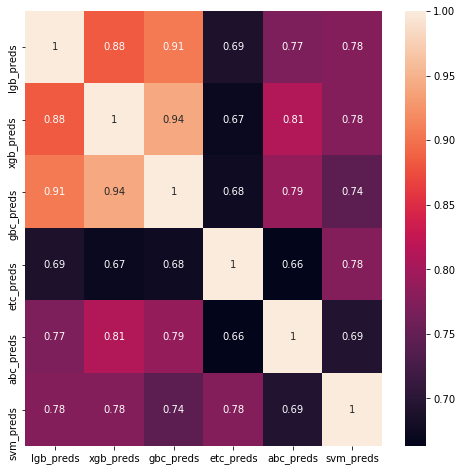

In [326]:
plt.figure(figsize = (8,8))

sns.heatmap(preds_df.corr(), annot=True)

In [374]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score

estimators = [('lgb',lgb), ('xgb', xgb),('gbc', gbc), ('etc', etc), ('abc', abc), ('svm', svm)]
model = VotingClassifier(estimators=estimators, voting='hard')

scores = cross_val_score(model, scaled_df_train, label, cv = 5, scoring = 'accuracy')

In [375]:
scores.mean()

0.5280127157674134

In [342]:
model.fit(scaled_df_train, label)

VotingClassifier(estimators=[('lgb',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=54, n_jobs=-1,
                                             num_leaves=20, objective=None,
                                             random_state=None, reg_alpha=0.0,
                                             reg_lambda=0.0, silent=True,
                                             subsamp...
                                                 n_estimat

In [343]:
preds = model.predict(scaled_df_test)

In [329]:
preds_lgb = lgb.predict_proba(test_copy[cols])
preds_xgb = xgb.predict_proba(test_copy[cols])
preds_gbc = gbc.predict_proba(test_copy[cols])
preds_etc = etc.predict_proba(test_copy[cols])
preds_abc = abc.predict_proba(test_copy[cols])
preds_svm = svm.predict_proba(scaled_df_test)

In [331]:
predictions = list()
lb_weight=0.2 # LGBM
xb_weight=0.25 # XGB
gb_weight=0.25 # GBC
et_weight=0.1 # ETC
ab_weight=0.1 # ABC
sv_weight=0.1

for i, j, k, l, m, n in zip(preds_lgb, preds_xgb, preds_gbc, preds_etc, preds_abc, preds_svm):
    xx = [(lb_weight * i[0]) + (xb_weight * j[0]) + (gb_weight * k[0]) + (et_weight * l[0]) + (ab_weight * m[0]) + (sv_weight * n[0]),
          (lb_weight * i[1]) + (xb_weight * j[1]) + (gb_weight * k[1]) + (et_weight * l[1]) + (ab_weight * m[1]) + (sv_weight * n[1]),
          (lb_weight * i[2]) + (xb_weight * j[2]) + (gb_weight * k[2]) + (et_weight * l[2]) + (ab_weight * m[2]) + (sv_weight * n[2]),
          (lb_weight * i[3]) + (xb_weight * j[3]) + (gb_weight * k[3]) + (et_weight * l[3]) + (ab_weight * m[3]) + (sv_weight * n[3])]
    predictions.append(xx)
# print(predictions[:10])
preds_ensemble=np.argmax(predictions,axis=1)

In [279]:
# pred_gbc = gbc.predict(test_copy[cols])

In [344]:
uncommon_seg = pd.DataFrame()

uncommon_seg['ID'] = list(test_copy.index)
uncommon_seg['Segmentation'] = preds

In [227]:
sub = pd.read_csv("/run/media/devesh/Hard Disk/Projects/Datahack-Customer-Segmentation/input/sample_submission.csv")

In [228]:
sub.drop(['Segmentation'], axis = 1, inplace = True)

In [345]:
seg = pd.concat([common_seg, uncommon_seg]).reset_index(drop = True)

In [346]:
seg.head()

ID  Segmentation
0  458989           1.0
1  458994           2.0
2  458996           0.0
3  459000           2.0
4  459001           2.0

In [347]:
seg.tail()

ID  Segmentation
2622  467913           1.0
2623  467930           2.0
2624  467938           0.0
2625  467960           0.0
2626  467968           3.0

In [348]:
final_sub = pd.merge(sub, seg, on = 'ID')

In [349]:
final_sub['Segmentation'] = final_sub['Segmentation'].map(rev_seg_dict)

In [350]:
final_sub.to_csv('sub_vote_2.csv', index = False)

In [276]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(max_iter=1000))

scores = cross_val_score(model, new_train_cat, label, cv = 5, scoring = 'accuracy')

In [278]:
scores.mean()

0.5288796649896174

In [295]:
model.fit(new_train_cat, label)

StackingClassifier(cv=None,
                   estimators=[('lgb',
                                LGBMClassifier(boosting_type='gbdt',
                                               class_weight=None,
                                               colsample_bytree=1.0,
                                               importance_type='split',
                                               learning_rate=0.1, max_depth=-1,
                                               min_child_samples=20,
                                               min_child_weight=0.001,
                                               min_split_gain=0.0,
                                               n_estimators=54, n_jobs=-1,
                                               num_leaves=20, objective=None,
                                               random_state=None, reg_alpha=0.0,
                                               reg_lambda=0.0, silent=Tr...
                                                   n_estimat

In [296]:
preds_stack = model.predict(test_copy[cols])

In [304]:
sub_2 = pd.read_csv('sub_2.csv')
sub_vote = pd.read_csv('sub_vote.csv')

In [305]:
sub_2.head()

ID Segmentation
0  458989            B
1  458994            C
2  458996            A
3  459000            C
4  459001            C

In [306]:
merge_sub = pd.merge(sub_2, sub_vote, on='ID')

In [308]:
is_same = []

for i in range(len(merge_sub)):
    if merge_sub['Segmentation_x'][i] == merge_sub['Segmentation_y'][i]:
        is_same.append(1)
    else:
        is_same.append(0)

In [309]:
merge_sub['is_same'] = is_same

In [401]:
len(merge_sub.loc[merge_sub['is_same'] == 0])

32